**IN THIS KERNEL, I WILL TRY TO EXAMINE A FINANCIAL TIME SERIES AND DO SOME MODELING**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
# Any results you write to the current directory are saved as output.

In [2]:
data =pd.read_csv("all_stocks_5yr.csv")

In [3]:
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [4]:
data.tail()

,date,open,high,low,close,volume,Name
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS
619039,2018-02-07,72.70,75.00,72.69,73.86,4534912,ZTS


In [5]:
#I just picked the first stock
data = data[data.Name == 'AAL']

In [6]:
data.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,54.00,54.64,53.59,53.88,3623078,AAL
1255,2018-02-02,53.49,53.99,52.03,52.10,5109361,AAL
1256,2018-02-05,51.99,52.39,49.75,49.76,6878284,AAL
1257,2018-02-06,49.32,51.50,48.79,51.18,6782480,AAL
1258,2018-02-07,50.91,51.98,50.89,51.40,4845831,AAL


Let's first use monte carlo simulation for forecasting 

In [7]:
from scipy.stats import norm
log_returns = np.log(1 + data.close.pct_change())
u = log_returns.mean() #Mean of the logarithmich return
var = log_returns.var() #Variance of the logarithic return
drift = u - (0.5 * var) #drift / trend of the logarithmic return
stdev = log_returns.std() #Standard deviation of the log return


t_intervals = 250 #I just wanted to forecast 250 time points
iterations = 10 #I wanted to have 10 different forecast

daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))
#daily_returns actually is some kind of a noise. When we multiply this with the t time price, we can obtain t+1 time price

Let's create a variable S0 (inital stock price) equals to the last  closing price .

In [8]:
S0 = data.close.iloc[-1]
S0

51.4

In [9]:
#Let us first create en empty matrix such as daily returns
price_list = np.zeros_like(daily_returns)
price_list[0] = S0
price_list

array([[51.4, 51.4, 51.4, ..., 51.4, 51.4, 51.4],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       ...,
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ]])

In [10]:
# With a simple for loop, we are going to forecast the next 250 days
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]
price_list = pd.DataFrame(price_list)
price_list['close'] = price_list[0]
price_list.head()

,0,1,2,3,4,5,6,7,8,9,close
0,51.400000,51.400000,51.400000,51.400000,51.400000,51.400000,51.400000,51.400000,51.400000,51.400000,51.400000
1,50.623709,51.358886,51.669053,51.084333,52.281047,49.985013,51.981472,50.318306,50.709317,52.728180,50.623709
2,48.371582,52.869546,51.294148,52.203981,51.620371,51.728997,53.539129,50.161678,50.633207,52.092578,48.371582
3,48.958224,53.166048,53.450857,50.551348,54.363772,51.897872,54.231166,49.318519,54.018678,51.792936,48.958224
4,48.756248,53.512893,53.151584,50.223760,53.746482,52.775982,54.361929,50.191995,53.740931,51.450727,48.756248


In [11]:
close = data.close
close = pd.DataFrame(close)
frames = [close, price_list]
monte_carlo_forecast = pd.concat(frames)

In [12]:
monte_carlo_forecast.head()

,close,0,1,2,3,4,5,6,7,8,9
0,14.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
monte_carlo_forecast.tail()

,close,0,1,2,3,4,5,6,7,8,9
245,57.072713,57.072713,71.139620,46.869350,41.033465,52.689461,68.512309,74.200340,104.048324,84.546648,54.418705
246,55.283385,55.283385,74.342201,46.819863,41.124968,51.945647,64.827948,71.519927,102.123687,83.118364,53.061128
247,55.394901,55.394901,74.471807,45.141375,39.725619,53.214257,64.509974,70.442881,99.342265,84.006958,50.675567
248,57.399919,57.399919,74.414830,45.101822,39.088865,53.281149,64.809484,72.475020,101.005478,87.269699,49.724993
249,59.189412,59.189412,76.321950,44.875069,37.648939,52.978285,66.588661,74.687337,102.611272,88.494456,49.390643


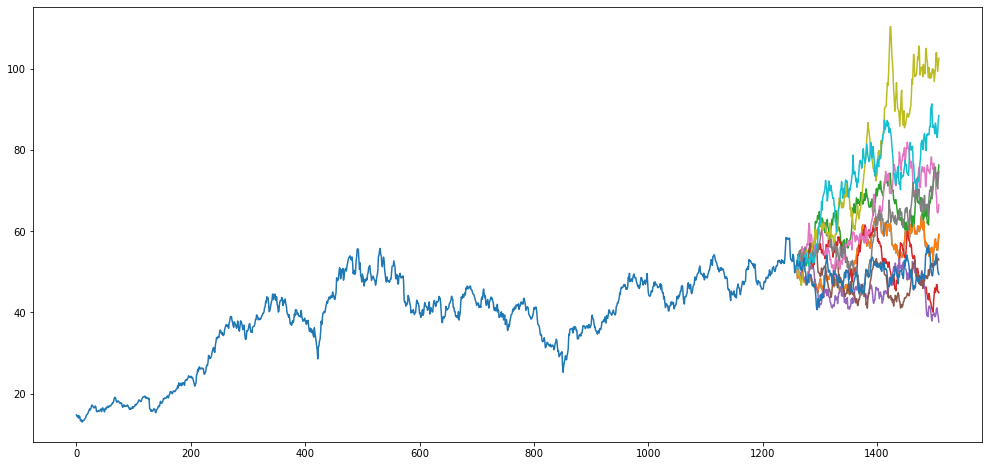

In [14]:
monte_carlo = monte_carlo_forecast.iloc[:,:].values
import matplotlib.pyplot as plt
plt.figure(figsize=(17,8))
plt.plot(monte_carlo)
plt.show()